# Feature extraction using VGG-16 and classifier training of ML models
 This code is adapted from the "Flowers17" classification project available at : https://github.com/Architectshwet/Flower-species-Recognition-using-Computer-vision-and-Machine-Learning

In [1]:
# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
#from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.layers import Input

# other imports
from sklearn.preprocessing import LabelEncoder
import numpy as np
import glob
import cv2
import h5py
import os
import json
import datetime
import time

Using TensorFlow backend.


In [2]:
import pandas as pd

In [3]:
with open('C:/Users/Nivedha/Documents/check2/config2.json') as f:
    config = json.load(f)

In [4]:
config

{'classifier_path': 'C:/Users/Nivedha/Documents/check2/classifier.pickle',
 'features_path': 'C:/Users/Nivedha/Documents/check2/feature.h5',
 'include_top': False,
 'labels_path': 'C:/Users/Nivedha/Documents/check2/label.h5',
 'model': 'vgg16',
 'model_path': 'C:/Users/Nivedha/Documents/check2/model',
 'num_classes': 4,
 'results': 'C:/Users/Nivedha/Documents/check2/results.txt',
 'seed': 9,
 'test_path': 'C:/Users/Nivedha/Documents/check2/prediction1/images',
 'test_size': 0.1,
 'train_path': 'C:/Users/Nivedha/Documents/check2/widerdata/images',
 'weights': 'imagenet'}

In [5]:
model_name = config["model"]
weights = config['weights']
include_top = config["include_top"]
train_path    = config["train_path"]
features_path   = config["features_path"]
labels_path   = config["labels_path"]
test_size     = config["test_size"]
results     = config["results"]
model_path    = config["model_path"]

In [6]:
# create the pretrained models
# check for pretrained weight usage or not
# check for top layers to be included or not
if model_name == "vgg16":
    base_model = VGG16(weights=weights, include_top=False)
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (224, 224)
elif model_name == "vgg19":
    base_model = VGG19(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
    image_size = (224, 224)
elif model_name == "resnet50":
    base_model = ResNet50(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('flatten').output)
    image_size = (224, 224)
elif model_name == "inceptionv3":
    base_model = InceptionV3(include_top=include_top, weights=weights, input_tensor=Input(shape=(299,299,3)))
    model = Model(input=base_model.input, output = base_model.output )
    image_size = (299, 299)
elif model_name == "inceptionresnetv2":
    base_model = InceptionResNetV2(include_top=include_top, weights=weights, input_tensor=Input(shape=(299,299,3)))
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (299, 299)
elif model_name == "mobilenet":
    base_model = MobileNet(include_top=include_top, weights=weights, input_tensor=Input(shape=(224,224,3)), input_shape=(224,224,3))
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (224, 224)
elif model_name == "xception":
    base_model = Xception(weights=weights)
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (299, 299)
else:
    base_model = None

C:\Users\Nivedha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


In [7]:
# path to training dataset
train_labels = os.listdir(train_path)

In [8]:
# encode the labels
print ("[INFO] encoding labels...")
le = LabelEncoder()
le.fit([tl for tl in train_labels])

[INFO] encoding labels...


LabelEncoder()

In [9]:
# variables to hold features and labels
features = []
labels   = []

# loop over all the labels in the folder
count = 1
for i, label in enumerate(train_labels):
    cur_path = train_path + "/" + label
    count = 1
    for image_path in glob.glob(cur_path + "/*.jpg"):
        img = image.load_img(image_path, target_size=image_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = model.predict(x)
        flat = feature.flatten()
        print (flat)
        features.append(flat)
        labels.append(label)
        print ("[INFO] processed - " + str(count))
        count += 1
        print ("[INFO] completed label - " + label)

[0.         0.         0.87398565 ... 0.         0.55594945 0.        ]
[INFO] processed - 1
[INFO] completed label - 0 Parade
[0.        0.        0.        ... 0.        0.5743274 0.       ]
[INFO] processed - 2
[INFO] completed label - 0 Parade
[0.         0.         0.         ... 0.         0.3533121  0.72509146]
[INFO] processed - 3
[INFO] completed label - 0 Parade
[0.3871764 0.        0.        ... 0.        1.0670078 0.       ]
[INFO] processed - 4
[INFO] completed label - 0 Parade
[0.         0.         0.         ... 0.         0.47859037 0.        ]
[INFO] processed - 5
[INFO] completed label - 0 Parade
[0.5996107  0.         0.         ... 0.         0.49986506 0.        ]
[INFO] processed - 6
[INFO] completed label - 0 Parade
[0.22295916 0.         0.7734567  ... 0.         0.9678133  0.        ]
[INFO] processed - 7
[INFO] completed label - 0 Parade
[0.14013311 0.         0.         ... 0.         1.3410215  0.        ]
[INFO] processed - 8
[INFO] completed label - 0 Par

[0.94512135 0.         0.         ... 0.         0.41173196 0.        ]
[INFO] processed - 67
[INFO] completed label - 0 Parade
[0.81016123 0.         0.         ... 0.         0.56586206 0.        ]
[INFO] processed - 68
[INFO] completed label - 0 Parade
[0.556726  0.        0.563747  ... 0.        0.7478272 0.       ]
[INFO] processed - 69
[INFO] completed label - 0 Parade
[0.         0.         0.         ... 0.         0.81774056 0.        ]
[INFO] processed - 70
[INFO] completed label - 0 Parade
[0.22593504 0.         0.         ... 0.683762   0.53215104 0.        ]
[INFO] processed - 71
[INFO] completed label - 0 Parade
[0.5744883  0.         0.         ... 0.         0.47874558 0.        ]
[INFO] processed - 72
[INFO] completed label - 0 Parade
[0.08921423 0.         0.         ... 0.         1.4551758  0.        ]
[INFO] processed - 73
[INFO] completed label - 0 Parade
[0.7838592 0.        0.        ... 0.        1.0375606 0.       ]
[INFO] processed - 74
[INFO] completed label

[0.       0.       0.       ... 0.       0.911361 0.      ]
[INFO] processed - 133
[INFO] completed label - 0 Parade
[0.07260542 0.         0.         ... 0.26428893 0.7928563  0.        ]
[INFO] processed - 134
[INFO] completed label - 0 Parade
[0.         0.         0.         ... 0.         0.69174194 0.        ]
[INFO] processed - 135
[INFO] completed label - 0 Parade
[0.22122538 0.         0.         ... 0.         0.8641839  0.        ]
[INFO] processed - 136
[INFO] completed label - 0 Parade
[0.       0.       0.       ... 0.       0.969565 0.      ]
[INFO] processed - 137
[INFO] completed label - 0 Parade
[0.4840679  0.         0.         ... 0.         0.44857252 0.        ]
[INFO] processed - 138
[INFO] completed label - 0 Parade
[0.        0.        0.        ... 0.        1.2704761 0.       ]
[INFO] processed - 139
[INFO] completed label - 0 Parade
[0.76704174 0.         0.         ... 0.         0.55360794 0.        ]
[INFO] processed - 140
[INFO] completed label - 0 Parad

[1.053471   0.         0.18218443 ... 0.         0.7098735  0.        ]
[INFO] processed - 198
[INFO] completed label - 0 Parade
[0.09756064 0.         0.         ... 0.         0.5176422  0.        ]
[INFO] processed - 199
[INFO] completed label - 0 Parade
[0.16755815 0.         0.         ... 0.         0.98474824 0.        ]
[INFO] processed - 200
[INFO] completed label - 0 Parade
[0.         0.         0.20928097 ... 0.         0.84089726 0.        ]
[INFO] processed - 201
[INFO] completed label - 0 Parade
[0.2352246  0.         0.         ... 0.         0.55296266 0.        ]
[INFO] processed - 202
[INFO] completed label - 0 Parade
[0.       0.       0.       ... 0.       0.973091 0.      ]
[INFO] processed - 203
[INFO] completed label - 0 Parade
[0.         0.         1.5621521  ... 0.         1.254138   0.21503158]
[INFO] processed - 204
[INFO] completed label - 0 Parade
[0.04168737 0.         0.         ... 0.         1.1424401  0.        ]
[INFO] processed - 205
[INFO] complet

[0.65523726 0.         0.13922754 ... 0.14443654 0.42056403 0.        ]
[INFO] processed - 52
[INFO] completed label - 1 Handshaking
[0.6796591 0.        0.        ... 0.        0.6024744 0.       ]
[INFO] processed - 53
[INFO] completed label - 1 Handshaking
[1.3833865  0.         0.         ... 0.         0.39212012 0.        ]
[INFO] processed - 54
[INFO] completed label - 1 Handshaking
[2.630316   0.         0.         ... 0.         0.29557574 0.        ]
[INFO] processed - 55
[INFO] completed label - 1 Handshaking
[0.        0.        0.        ... 0.        1.3611152 0.       ]
[INFO] processed - 56
[INFO] completed label - 1 Handshaking
[0.99489915 0.         0.1702463  ... 0.         0.31583866 0.        ]
[INFO] processed - 57
[INFO] completed label - 1 Handshaking
[0.3069685 0.        0.        ... 0.        1.0948272 0.       ]
[INFO] processed - 58
[INFO] completed label - 1 Handshaking
[0.9784911  0.         0.         ... 0.         0.65748495 0.        ]
[INFO] processe

[0.3375496 0.        0.        ... 0.        0.5474014 0.       ]
[INFO] processed - 115
[INFO] completed label - 1 Handshaking
[0.         0.         0.         ... 0.         0.52507484 0.        ]
[INFO] processed - 116
[INFO] completed label - 1 Handshaking
[0.10228181 0.         0.         ... 0.         0.57759416 0.        ]
[INFO] processed - 117
[INFO] completed label - 1 Handshaking
[0.         0.         0.         ... 0.         0.80682683 0.        ]
[INFO] processed - 118
[INFO] completed label - 1 Handshaking
[0.         0.         0.         ... 0.         0.90243185 0.2560917 ]
[INFO] processed - 119
[INFO] completed label - 1 Handshaking
[0.        0.        0.        ... 0.        0.6740287 0.       ]
[INFO] processed - 120
[INFO] completed label - 1 Handshaking
[0.         0.         0.         ... 0.         0.60030806 0.        ]
[INFO] processed - 121
[INFO] completed label - 1 Handshaking
[0.        0.        0.        ... 0.        1.0721902 0.       ]
[INFO] p

[0. 0. 0. ... 0. 0. 0.]
[INFO] processed - 178
[INFO] completed label - 1 Handshaking
[0.07095633 0.         0.         ... 0.         0.2573329  0.        ]
[INFO] processed - 179
[INFO] completed label - 1 Handshaking
[0.        0.        0.        ... 0.        0.8568009 0.       ]
[INFO] processed - 180
[INFO] completed label - 1 Handshaking
[0.         0.         0.         ... 0.         0.84377754 0.        ]
[INFO] processed - 181
[INFO] completed label - 1 Handshaking
[0.35344976 0.         0.         ... 0.         0.         0.        ]
[INFO] processed - 182
[INFO] completed label - 1 Handshaking
[0.         0.         0.         ... 0.19222909 1.2315135  0.        ]
[INFO] processed - 183
[INFO] completed label - 1 Handshaking
[0.23026319 0.         0.         ... 0.         0.74477774 0.        ]
[INFO] processed - 184
[INFO] completed label - 1 Handshaking
[0.        0.        0.        ... 0.8443808 1.2530873 0.       ]
[INFO] processed - 185
[INFO] completed label - 1 

[0.5259841  0.         0.         ... 0.         0.57067233 0.        ]
[INFO] processed - 31
[INFO] completed label - 2 Demonstration
[0.         0.         0.6257674  ... 0.         0.27727592 0.        ]
[INFO] processed - 32
[INFO] completed label - 2 Demonstration
[0.         0.         0.64725494 ... 0.         0.34364384 0.        ]
[INFO] processed - 33
[INFO] completed label - 2 Demonstration
[0.        0.        0.        ... 0.        1.2166184 0.       ]
[INFO] processed - 34
[INFO] completed label - 2 Demonstration
[0.        0.        0.        ... 0.        0.6768511 0.       ]
[INFO] processed - 35
[INFO] completed label - 2 Demonstration
[0.        0.        0.        ... 0.        0.5908589 0.       ]
[INFO] processed - 36
[INFO] completed label - 2 Demonstration
[1.1363927 0.        0.        ... 0.        0.9259039 0.       ]
[INFO] processed - 37
[INFO] completed label - 2 Demonstration
[0.         0.         0.03215414 ... 0.         0.58815414 0.        ]
[INFO] 

[0.         0.         0.         ... 0.         0.77931273 0.        ]
[INFO] processed - 93
[INFO] completed label - 2 Demonstration
[0.05768506 0.         0.         ... 0.         0.8857176  0.        ]
[INFO] processed - 94
[INFO] completed label - 2 Demonstration
[0.06943143 0.         0.         ... 0.40077457 0.6457402  0.        ]
[INFO] processed - 95
[INFO] completed label - 2 Demonstration
[0.43640852 0.         0.         ... 0.         0.84411013 0.        ]
[INFO] processed - 96
[INFO] completed label - 2 Demonstration
[0.        0.        0.7868382 ... 0.        0.8808089 0.       ]
[INFO] processed - 97
[INFO] completed label - 2 Demonstration
[0.         0.         0.         ... 0.20237231 0.35458103 0.        ]
[INFO] processed - 98
[INFO] completed label - 2 Demonstration
[0.         0.         0.         ... 0.         0.99443364 0.        ]
[INFO] processed - 99
[INFO] completed label - 2 Demonstration
[0.0747488 0.        0.        ... 0.        0.8638762 0.    

[1.7792876 0.        0.        ... 0.        0.2548056 0.       ]
[INFO] processed - 154
[INFO] completed label - 2 Demonstration
[0. 0. 0. ... 0. 0. 0.]
[INFO] processed - 155
[INFO] completed label - 2 Demonstration
[0.00888793 0.         0.         ... 0.         0.92747605 0.        ]
[INFO] processed - 156
[INFO] completed label - 2 Demonstration
[0.08936843 0.         0.         ... 0.         0.574963   0.        ]
[INFO] processed - 157
[INFO] completed label - 2 Demonstration
[0.11168732 0.         0.2731486  ... 0.         1.0283448  0.        ]
[INFO] processed - 158
[INFO] completed label - 2 Demonstration
[0.         0.         0.17629272 ... 0.47153428 0.51012444 0.25299534]
[INFO] processed - 159
[INFO] completed label - 2 Demonstration
[0.00625134 0.         0.         ... 0.         0.93026805 0.        ]
[INFO] processed - 160
[INFO] completed label - 2 Demonstration
[0.38777673 0.         0.         ... 0.         0.4555141  0.        ]
[INFO] processed - 161
[INFO] 

[0.01748429 0.         0.         ... 0.         0.81745005 0.        ]
[INFO] processed - 7
[INFO] completed label - 3 Riot
[0.11606309 0.         0.         ... 0.16809162 0.6656626  0.        ]
[INFO] processed - 8
[INFO] completed label - 3 Riot
[1.1832458  0.         0.         ... 0.         0.87080795 0.        ]
[INFO] processed - 9
[INFO] completed label - 3 Riot
[0.617537   0.         0.         ... 0.         0.53409827 0.        ]
[INFO] processed - 10
[INFO] completed label - 3 Riot
[0.        0.        0.        ... 0.        0.6862007 0.       ]
[INFO] processed - 11
[INFO] completed label - 3 Riot
[0.        0.        0.        ... 0.        0.5608624 0.       ]
[INFO] processed - 12
[INFO] completed label - 3 Riot
[0.27046308 0.         0.30496088 ... 0.         0.7309431  0.        ]
[INFO] processed - 13
[INFO] completed label - 3 Riot
[1.2918878 0.        0.9681603 ... 0.        1.1979918 0.       ]
[INFO] processed - 14
[INFO] completed label - 3 Riot
[0.15601453 0

[0.         0.         0.         ... 0.         0.24794036 0.        ]
[INFO] processed - 74
[INFO] completed label - 3 Riot
[0.15647644 0.         0.         ... 0.         1.1771448  0.        ]
[INFO] processed - 75
[INFO] completed label - 3 Riot
[0.         0.         0.         ... 0.46642292 0.9175224  0.        ]
[INFO] processed - 76
[INFO] completed label - 3 Riot
[0.        0.        0.        ... 0.        0.6925435 0.       ]
[INFO] processed - 77
[INFO] completed label - 3 Riot
[0.86858714 0.         0.36006242 ... 0.         0.6973947  0.        ]
[INFO] processed - 78
[INFO] completed label - 3 Riot
[1.8115227  0.         2.9545755  ... 0.         0.96422744 0.        ]
[INFO] processed - 79
[INFO] completed label - 3 Riot
[0.9827905  0.         0.38743165 ... 0.         0.14111373 0.        ]
[INFO] processed - 80
[INFO] completed label - 3 Riot
[0.       0.       0.       ... 0.       1.026345 0.      ]
[INFO] processed - 81
[INFO] completed label - 3 Riot
[0.8938231

[0.        0.        1.0574639 ... 0.        0.5439573 0.       ]
[INFO] processed - 140
[INFO] completed label - 3 Riot
[0.25814712 0.         0.         ... 0.         0.4841832  0.        ]
[INFO] processed - 141
[INFO] completed label - 3 Riot
[0.         0.         0.01125097 ... 0.         0.         0.        ]
[INFO] processed - 142
[INFO] completed label - 3 Riot
[0.17639863 0.         0.         ... 0.         0.615013   0.        ]
[INFO] processed - 143
[INFO] completed label - 3 Riot
[0.5439151  0.         0.48749682 ... 0.         0.9588105  0.        ]
[INFO] processed - 144
[INFO] completed label - 3 Riot
[0.        0.        0.        ... 0.        0.9866908 0.       ]
[INFO] processed - 145
[INFO] completed label - 3 Riot
[0.        0.        0.6405068 ... 0.        0.6974134 0.       ]
[INFO] processed - 146
[INFO] completed label - 3 Riot
[0.        0.        0.        ... 0.        0.6068819 0.       ]
[INFO] processed - 147
[INFO] completed label - 3 Riot
[0.     

[0.         0.         0.         ... 0.10431496 0.73148793 0.        ]
[INFO] processed - 206
[INFO] completed label - 3 Riot
[0.21739776 0.         0.         ... 0.         0.8465222  0.        ]
[INFO] processed - 207
[INFO] completed label - 3 Riot
[0.8938597  0.         0.         ... 0.0734734  0.63442045 0.        ]
[INFO] processed - 208
[INFO] completed label - 3 Riot
[0.14994726 0.         0.         ... 0.         1.6369076  0.        ]
[INFO] processed - 209
[INFO] completed label - 3 Riot
[0.3055488  0.         0.59477836 ... 0.         0.6831448  0.        ]
[INFO] processed - 210
[INFO] completed label - 3 Riot
[0.         0.         0.         ... 0.08804024 0.37078848 0.31348786]
[INFO] processed - 1
[INFO] completed label - 4 Cheering
[0.        0.        0.        ... 0.        0.3203568 0.       ]
[INFO] processed - 2
[INFO] completed label - 4 Cheering
[1.2942799  0.         2.0063152  ... 0.         0.45599347 0.        ]
[INFO] processed - 3
[INFO] completed lab

[1.5134909 0.        0.        ... 0.        0.886979  0.       ]
[INFO] processed - 60
[INFO] completed label - 4 Cheering
[0.        0.        0.        ... 0.        0.2624936 0.       ]
[INFO] processed - 61
[INFO] completed label - 4 Cheering
[0.         0.         0.         ... 0.         0.58153915 0.        ]
[INFO] processed - 62
[INFO] completed label - 4 Cheering
[0.88337755 0.         0.25530046 ... 0.15462664 0.8420422  0.        ]
[INFO] processed - 63
[INFO] completed label - 4 Cheering
[0.35514334 0.         0.         ... 0.         0.6488732  0.        ]
[INFO] processed - 64
[INFO] completed label - 4 Cheering
[0.12287306 0.         0.         ... 0.0410929  0.64565253 0.        ]
[INFO] processed - 65
[INFO] completed label - 4 Cheering
[0.02937853 0.         0.         ... 0.         0.2018671  0.        ]
[INFO] processed - 66
[INFO] completed label - 4 Cheering
[1.0889003  0.         0.         ... 0.3185641  0.92578566 0.        ]
[INFO] processed - 67
[INFO] c

[0.         0.0974775  0.18661037 ... 0.02418746 0.8269978  0.        ]
[INFO] processed - 125
[INFO] completed label - 4 Cheering
[0.84723836 0.         0.37398577 ... 0.         1.1124449  0.        ]
[INFO] processed - 126
[INFO] completed label - 4 Cheering
[0.55452895 0.         0.         ... 0.         0.40067622 0.        ]
[INFO] processed - 127
[INFO] completed label - 4 Cheering
[0.14579219 0.         0.         ... 0.         0.78334135 1.0509907 ]
[INFO] processed - 128
[INFO] completed label - 4 Cheering
[0.        0.        0.        ... 0.        0.7494703 0.       ]
[INFO] processed - 129
[INFO] completed label - 4 Cheering
[1.0206306  0.         0.         ... 0.         0.54411584 0.        ]
[INFO] processed - 130
[INFO] completed label - 4 Cheering
[0.51509726 0.         0.         ... 0.         0.0995096  0.        ]
[INFO] processed - 131
[INFO] completed label - 4 Cheering
[0.6728331  0.         0.         ... 0.         0.26508236 0.        ]
[INFO] processed 

[0.2876585  0.         0.         ... 0.         0.06242931 0.        ]
[INFO] processed - 190
[INFO] completed label - 4 Cheering
[0.08177987 0.         0.         ... 0.         0.44825882 0.        ]
[INFO] processed - 191
[INFO] completed label - 4 Cheering
[0.8149878  0.         0.42269862 ... 0.         0.4885211  0.        ]
[INFO] processed - 192
[INFO] completed label - 4 Cheering
[0.         0.         0.02591604 ... 0.         0.67379946 0.        ]
[INFO] processed - 193
[INFO] completed label - 4 Cheering
[0.         0.         0.         ... 0.00155181 1.3220769  0.80536306]
[INFO] processed - 194
[INFO] completed label - 4 Cheering
[0.2794855  0.         0.         ... 0.         0.62206185 0.        ]
[INFO] processed - 195
[INFO] completed label - 4 Cheering
[0.3325064  0.         0.         ... 0.         0.10114127 0.        ]
[INFO] processed - 196
[INFO] completed label - 4 Cheering
[0.        0.        0.        ... 0.        1.5771058 0.       ]
[INFO] processed 

[0.       0.       0.       ... 0.       1.104718 0.      ]
[INFO] processed - 44
[INFO] completed label - 5 Shoppers
[0.      0.      0.      ... 0.      1.28391 0.     ]
[INFO] processed - 45
[INFO] completed label - 5 Shoppers
[0.        0.        0.        ... 0.        0.7006742 0.       ]
[INFO] processed - 46
[INFO] completed label - 5 Shoppers
[0.4046505 0.        0.4006334 ... 0.        0.7033575 0.       ]
[INFO] processed - 47
[INFO] completed label - 5 Shoppers
[0.7526767 0.        0.        ... 0.        1.2684519 0.       ]
[INFO] processed - 48
[INFO] completed label - 5 Shoppers
[0.        0.        0.        ... 0.        0.6637905 0.       ]
[INFO] processed - 49
[INFO] completed label - 5 Shoppers
[0.         0.         0.         ... 0.         0.47606805 0.        ]
[INFO] processed - 50
[INFO] completed label - 5 Shoppers
[1.1811929 0.        0.        ... 0.        1.8147354 0.       ]
[INFO] processed - 51
[INFO] completed label - 5 Shoppers
[0.9360043 0.       

[0.         0.         0.09785599 ... 0.         0.27710003 0.        ]
[INFO] processed - 110
[INFO] completed label - 5 Shoppers
[0.6686325  0.         0.51127094 ... 0.         0.69441926 0.        ]
[INFO] processed - 111
[INFO] completed label - 5 Shoppers
[1.0105777 0.        0.        ... 0.        0.3538798 0.       ]
[INFO] processed - 112
[INFO] completed label - 5 Shoppers
[0.7301699  0.         0.         ... 0.         0.51915205 0.        ]
[INFO] processed - 113
[INFO] completed label - 5 Shoppers
[1.0931398  0.         0.17108968 ... 0.         1.6460478  0.        ]
[INFO] processed - 114
[INFO] completed label - 5 Shoppers
[0. 0. 0. ... 0. 0. 0.]
[INFO] processed - 115
[INFO] completed label - 5 Shoppers
[0. 0. 0. ... 0. 0. 0.]
[INFO] processed - 116
[INFO] completed label - 5 Shoppers
[0.74230206 0.         0.46605945 ... 0.         0.88500524 0.        ]
[INFO] processed - 117
[INFO] completed label - 5 Shoppers
[0.13339898 0.         0.         ... 0.         0.771

[0.        0.        0.        ... 0.        0.9340143 0.       ]
[INFO] processed - 175
[INFO] completed label - 5 Shoppers
[0.35967883 0.         0.         ... 0.         0.23541239 0.        ]
[INFO] processed - 176
[INFO] completed label - 5 Shoppers
[0.         0.         0.         ... 0.         0.39625108 0.        ]
[INFO] processed - 177
[INFO] completed label - 5 Shoppers
[0.6465264  0.0909704  0.79385155 ... 0.         1.6377053  0.        ]
[INFO] processed - 178
[INFO] completed label - 5 Shoppers
[0.70964265 0.         0.         ... 0.         0.59901404 0.        ]
[INFO] processed - 179
[INFO] completed label - 5 Shoppers
[0.32879338 0.         0.         ... 0.         0.84522957 0.        ]
[INFO] processed - 180
[INFO] completed label - 5 Shoppers
[0.         0.         0.         ... 0.         0.17919075 0.        ]
[INFO] processed - 181
[INFO] completed label - 5 Shoppers
[0.         0.         0.31427497 ... 0.         1.0301723  0.        ]
[INFO] processed 

[1.850239   0.         2.0574532  ... 0.         0.84185433 0.        ]
[INFO] processed - 31
[INFO] completed label - 6 Soccer
[0.0996367  0.         0.         ... 0.         0.76782423 0.        ]
[INFO] processed - 32
[INFO] completed label - 6 Soccer
[0.8345996 0.        0.        ... 0.        0.        0.       ]
[INFO] processed - 33
[INFO] completed label - 6 Soccer
[0.12153612 0.         0.         ... 0.         0.8930342  0.        ]
[INFO] processed - 34
[INFO] completed label - 6 Soccer
[0.         0.         0.         ... 0.         0.56962925 0.        ]
[INFO] processed - 35
[INFO] completed label - 6 Soccer
[0.14120911 0.         0.         ... 0.         0.39215958 0.        ]
[INFO] processed - 36
[INFO] completed label - 6 Soccer
[0.5181141 0.        0.2346794 ... 0.        1.0960655 0.       ]
[INFO] processed - 37
[INFO] completed label - 6 Soccer
[0.        0.        0.1502552 ... 0.        1.0078155 0.       ]
[INFO] processed - 38
[INFO] completed label - 6 S

[0.         0.         0.         ... 0.         0.69481444 0.        ]
[INFO] processed - 96
[INFO] completed label - 6 Soccer
[0.67678666 0.         0.         ... 0.         0.9211743  0.        ]
[INFO] processed - 97
[INFO] completed label - 6 Soccer
[1.6975713 0.        0.        ... 0.        0.5811199 0.       ]
[INFO] processed - 98
[INFO] completed label - 6 Soccer
[0.         0.         0.         ... 0.         0.34975016 0.        ]
[INFO] processed - 99
[INFO] completed label - 6 Soccer
[0.         0.         0.         ... 0.         0.47025824 0.        ]
[INFO] processed - 100
[INFO] completed label - 6 Soccer
[0.        0.        0.        ... 0.        0.5930928 0.       ]
[INFO] processed - 101
[INFO] completed label - 6 Soccer
[0.01464038 0.         0.08872026 ... 0.         0.2975288  0.        ]
[INFO] processed - 102
[INFO] completed label - 6 Soccer
[0.089434   0.         0.         ... 0.         0.17036048 0.        ]
[INFO] processed - 103
[INFO] completed l

[0.16361196 0.         0.         ... 0.         0.6686393  0.        ]
[INFO] processed - 161
[INFO] completed label - 6 Soccer
[0.00677067 0.         0.         ... 0.         0.7329658  0.        ]
[INFO] processed - 162
[INFO] completed label - 6 Soccer
[0.         0.         0.         ... 0.         0.55084366 0.10089022]
[INFO] processed - 163
[INFO] completed label - 6 Soccer
[0.7163326  0.         0.         ... 0.50120616 0.88794893 0.        ]
[INFO] processed - 164
[INFO] completed label - 6 Soccer
[0.16420403 0.         0.         ... 0.09372633 0.58051354 0.        ]
[INFO] processed - 165
[INFO] completed label - 6 Soccer
[0.6291535  0.         0.         ... 0.         0.25646695 0.        ]
[INFO] processed - 166
[INFO] completed label - 6 Soccer
[0.28667316 0.         0.25616166 ... 0.         0.3804886  0.        ]
[INFO] processed - 167
[INFO] completed label - 6 Soccer
[0.3161614  0.         0.         ... 0.84508085 0.501758   0.15854171]
[INFO] processed - 168
[I

In [10]:
# encode the labels using LabelEncoder
le = LabelEncoder()
le_labels = le.fit_transform(labels)

# get the shape of training labels
print ("[STATUS] training labels: {}".format(le_labels))
print ("[STATUS] training labels shape: {}".format(le_labels.shape))

[STATUS] training labels: [0 0 0 ... 6 6 6]
[STATUS] training labels shape: (1470,)


In [11]:
# save features and labels
h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_01', data=np.array(features))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_02', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

In [12]:
# save model and weights
model_json = model.to_json()
with open(model_path + str(test_size) + ".json", "w") as json_file:
    json_file.write(model_json)

# save weights
model.save_weights(model_path + str(test_size) + ".h5")
print("[STATUS] saved model and weights to disk..")

print ("[STATUS] features and labels saved..")

[STATUS] saved model and weights to disk..
[STATUS] features and labels saved..


In [20]:
# organize imports
from __future__ import print_function

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
# load the user configs
with open('C:/Users/Nivedha/Documents/check2/config2.json') as f:    
    config = json.load(f)

In [12]:
# config variables
test_size     = config["test_size"]
seed      =     config["seed"]
features_path   = config["features_path"]
labels_path   = config["labels_path"]
results     = config["results"]
classifier_path = config["classifier_path"]
train_path    = config["train_path"]
num_classes   = config["num_classes"]
classifier_path = config["classifier_path"]

In [13]:
# import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_01']
labels_string   = h5f_label['dataset_02']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [14]:
h5f_data

<Closed HDF5 file>

In [15]:
features.shape, labels.shape

((1470, 25088), (1470,))

In [16]:
df_vgg16 = pd.DataFrame(features)

In [17]:
df_vgg16['target'] = labels

In [18]:
df_vgg16.head()

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,target
0,0.000000,0.0,0.873986,0.0,0.562229,0.0,0.000000,0.000000,0.0,0.0,...,0.396955,0.000000,0.0,0.006428,0.211608,0.424578,0.0,0.555949,0.000000,0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.488606,0.000000,0.0,0.000000,0.180257,0.377139,0.0,0.574327,0.000000,0
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.143159,0.0,0.0,...,0.000000,0.495286,0.0,0.343770,0.000000,0.000000,0.0,0.353312,0.725091,0
3,0.387176,0.0,0.000000,0.0,0.609777,0.0,0.000000,0.000000,0.0,0.0,...,0.462931,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.067008,0.000000,0
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.296336,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.369118,0.000000,0.000000,0.0,0.478590,0.000000,0


In [21]:
# verify the shape of features and labels
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] features shape: (1470, 25088)
[INFO] labels shape: (1470,)
[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (1323, 25088)
[INFO] test data   : (147, 25088)
[INFO] train labels: (1323,)
[INFO] test labels : (147,)


In [22]:
set(testLabels)

{0, 1, 2, 3, 4, 5, 6}

In [23]:
set(trainLabels)

{0, 1, 2, 3, 4, 5, 6}

In [31]:
# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# use rank-1 and rank-5 predictions
print ("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0
rank_5 = 0

# loop over test data
for (label, features) in zip(testLabels, testData):
  # predict the probability of each class label and
  # take the top-5 class labels
    predictions = model.predict_proba(np.atleast_2d(features))[0]
    predictions = np.argsort(predictions)[::-1][:5]

  # rank-1 prediction increment
    if label == predictions[0]:
        rank_1 += 1

  # rank-5 prediction increment
    if label in predictions:
        rank_5 += 1

# convert accuracies to percentages
rank_1 = (rank_1 / float(len(testLabels))) * 100
rank_5 = (rank_5 / float(len(testLabels))) * 100

# write the accuracies to file
f.write("Rank-1: {:.2f}%\n".format(rank_1))
f.write("Rank-5: {:.2f}%\n\n".format(rank_5))

[INFO] evaluating model...


16

In [33]:
# evaluate the model of test data
preds = model.predict(testData)

# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

In [34]:
accuracy_score(testLabels, preds)

0.6258503401360545

[INFO] confusion matrix


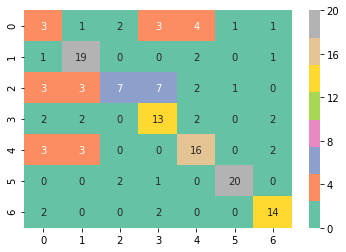

In [35]:
# display the confusion matrix
print ("[INFO] confusion matrix")

# get the list of training lables
labels = sorted(list(os.listdir(train_path)))

# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [25]:
# import the necessary packages
import h5py
import numpy as np
import os
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

C:\Users\Nivedha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
# no.of.trees for Random Forests
num_trees = 100
# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))

In [38]:
# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

LR: 0.594913 (0.030811)
LDA: 0.567618 (0.025490)
KNN: 0.344646 (0.037330)
CART: 0.275177 (0.037661)
RF: 0.495756 (0.039024)
NB: 0.260726 (0.024602)
SVM: 0.517669 (0.039560)


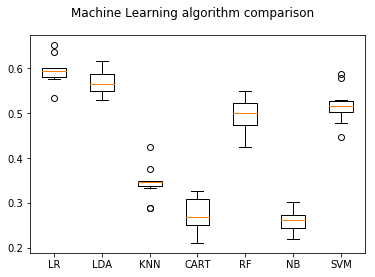

Wall time: 19min 19s


In [39]:
%%time
# filter all the warnings
import warnings
warnings.filterwarnings('ignore')
trainData, trainLabels
# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, trainData, trainLabels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Testing Process

In [27]:
with open('C:/Users/Nivedha/Documents/check2/config2.json') as f:
    config = json.load(f)

In [28]:
config

{'classifier_path': 'C:/Users/Nivedha/Documents/check2/classifier.pickle',
 'features_path': 'C:/Users/Nivedha/Documents/check2/feature.h5',
 'include_top': False,
 'labels_path': 'C:/Users/Nivedha/Documents/check2/label.h5',
 'model': 'vgg16',
 'model_path': 'C:/Users/Nivedha/Documents/check2/model',
 'num_classes': 4,
 'results': 'C:/Users/Nivedha/Documents/check2/results.txt',
 'seed': 9,
 'test_path': 'C:/Users/Nivedha/Documents/check2/prediction1/images',
 'test_size': 0.1,
 'train_path': 'C:/Users/Nivedha/Documents/check2/widerdata/images',
 'weights': 'imagenet'}

In [29]:
model_name = config["model"]
weights = config['weights']
include_top = config["include_top"]
train_path    = config["train_path"]
test_path = config["test_path"]
features_path   = config["features_path"]
labels_path   = config["labels_path"]
test_size     = config["test_size"]
results     = config["results"]
model_path    = config["model_path"]

In [34]:
# create the pretrained models
# check for pretrained weight usage or not
# check for top layers to be included or not
if model_name == "vgg16":
    base_model = VGG16(weights=weights, include_top=False)
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (224, 224)
elif model_name == "vgg19":
    base_model = VGG19(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
    image_size = (224, 224)
elif model_name == "resnet50":
    base_model = ResNet50(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('flatten').output)
    image_size = (224, 224)
elif model_name == "inceptionv3":
    base_model = InceptionV3(include_top=include_top, weights=weights, input_tensor=Input(shape=(299,299,3)))
    model = Model(input=base_model.input, output = base_model.output )
    image_size = (299, 299)
elif model_name == "inceptionresnetv2":
    base_model = InceptionResNetV2(include_top=include_top, weights=weights, input_tensor=Input(shape=(299,299,3)))
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (299, 299)
elif model_name == "mobilenet":
    base_model = MobileNet(include_top=include_top, weights=weights, input_tensor=Input(shape=(224,224,3)), input_shape=(224,224,3))
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (224, 224)
elif model_name == "xception":
    base_model = Xception(weights=weights)
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (299, 299)
else:
    base_model = None

C:\Users\Nivedha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


In [30]:
# path to training dataset
test_labels = os.listdir(test_path)
test_labels

['0 Parade',
 '1 Handshaking',
 '2 Demonstration',
 '3 Riot',
 '4 Cheering',
 '5 Shoppers',
 '6 Soccer']

In [31]:
# encode the labels
print ("[INFO] encoding labels...")
le1 = LabelEncoder()
le1.fit([tl for tl in test_labels])

[INFO] encoding labels...


LabelEncoder()

In [32]:
# variables to hold features and labels
test_features = []
labels_test   = []

# loop over all the labels in the folder
count = 1
for i, label in enumerate(test_labels):
    cur_path = test_path + "/" + label
    count = 1
    for image_path in glob.glob(cur_path + "/*.jpg"):
        img = image.load_img(image_path, target_size=image_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = model.predict(x)
        flat = feature.flatten()
        print (flat)
        test_features.append(flat)
        labels_test.append(label)
        print ("[INFO] processed - " + str(count))
        count += 1
        print ("[INFO] completed label - " + label)

[0.6275245 0.        0.        ... 0.        0.6042613 0.1570022]
[INFO] processed - 1
[INFO] completed label - 0 Parade
[0.6956339  0.         0.         ... 0.         0.17219403 0.        ]
[INFO] processed - 2
[INFO] completed label - 0 Parade
[0.        0.        0.        ... 0.        1.5667424 0.       ]
[INFO] processed - 3
[INFO] completed label - 0 Parade
[0.        0.        0.        ... 0.        1.2695153 0.       ]
[INFO] processed - 4
[INFO] completed label - 0 Parade
[1.0178039  0.         0.48584324 ... 0.         1.0483563  0.        ]
[INFO] processed - 5
[INFO] completed label - 0 Parade
[1.479365  0.        0.        ... 0.        1.1218677 0.       ]
[INFO] processed - 6
[INFO] completed label - 0 Parade
[1.0797946 0.        0.        ... 0.        1.7234349 0.       ]
[INFO] processed - 7
[INFO] completed label - 0 Parade
[0.         0.         0.         ... 0.         0.50835407 0.        ]
[INFO] processed - 8
[INFO] completed label - 0 Parade
[0.        0. 

[0.         0.         0.         ... 0.         0.47050318 0.        ]
[INFO] processed - 5
[INFO] completed label - 3 Riot
[0.55176616 0.         0.         ... 0.         0.89659524 0.        ]
[INFO] processed - 6
[INFO] completed label - 3 Riot
[0.        0.        0.        ... 0.        0.7539274 0.       ]
[INFO] processed - 7
[INFO] completed label - 3 Riot
[0.07315533 0.         0.         ... 0.         0.8106325  0.        ]
[INFO] processed - 8
[INFO] completed label - 3 Riot
[0.8019181 0.        1.2331262 ... 0.        0.8258647 0.       ]
[INFO] processed - 9
[INFO] completed label - 3 Riot
[7.5257504e-01 0.0000000e+00 1.8292665e-04 ... 0.0000000e+00 8.7864190e-01
 0.0000000e+00]
[INFO] processed - 10
[INFO] completed label - 3 Riot
[0.        0.        0.        ... 0.        0.6289692 0.       ]
[INFO] processed - 11
[INFO] completed label - 3 Riot
[0.20669354 0.         0.3225615  ... 0.         0.6238622  0.        ]
[INFO] processed - 12
[INFO] completed label - 3 R

[0.         0.         0.16471303 ... 0.         0.7329538  0.        ]
[INFO] processed - 10
[INFO] completed label - 6 Soccer
[0.09674945 0.         0.         ... 0.07629668 0.27902457 0.        ]
[INFO] processed - 11
[INFO] completed label - 6 Soccer
[0.24035484 0.         0.         ... 0.         0.6621494  0.        ]
[INFO] processed - 12
[INFO] completed label - 6 Soccer
[0.        0.        0.        ... 0.        0.4382943 0.       ]
[INFO] processed - 13
[INFO] completed label - 6 Soccer
[0.        0.        0.        ... 0.        0.8381781 0.       ]
[INFO] processed - 14
[INFO] completed label - 6 Soccer
[0.        0.        0.0054667 ... 0.        0.7799656 0.       ]
[INFO] processed - 15
[INFO] completed label - 6 Soccer
[0.       0.       0.       ... 0.       0.706508 0.      ]
[INFO] processed - 16
[INFO] completed label - 6 Soccer
[0.10021821 0.         0.25054815 ... 0.         0.8096416  0.        ]
[INFO] processed - 17
[INFO] completed label - 6 Soccer
[0.300

In [33]:
# encode the labels using LabelEncoder
le = LabelEncoder()
le_labels_test = le.fit_transform(labels_test)

# get the shape of training labels
print ("[STATUS] training labels: {}".format(le_labels_test))
print ("[STATUS] training labels shape: {}".format(le_labels_test.shape))

[STATUS] training labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[STATUS] training labels shape: (140,)


In [34]:
# save features and labels
h5f_data = h5py.File('C:/Users/Nivedha/Documents/dataset_prac/vgg16features.h5', 'w')
h5f_data.create_dataset('dataset_09', data=np.array(test_features))

h5f_label = h5py.File('C:/Users/Nivedha/Documents/dataset_prac/vgg16labels.h5', 'w')
h5f_label.create_dataset('dataset_10', data=np.array(le_labels_test))

h5f_data.close()
h5f_label.close()

In [35]:
# import features and labels
h5f_data1  = h5py.File('C:/Users/Nivedha/Documents/dataset_prac/vgg16features.h5', 'r')
h5f_label1 = h5py.File('C:/Users/Nivedha/Documents/dataset_prac/vgg16labels.h5', 'r')

features_string1 = h5f_data1['dataset_09']
labels_string1   = h5f_label1['dataset_10']

features1 = np.array(features_string1)
labels1   = np.array(labels_string1)

h5f_data.close()
h5f_label.close()

In [36]:
features1.shape, labels1.shape

((140, 25088), (140,))

In [37]:
# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
# evaluate the model of test data
preds1 = model.predict(features1)

In [39]:
accuracy_score(labels1, preds1)

0.7714285714285715

In [40]:
preds1

array([3, 0, 0, 5, 0, 0, 2, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 4, 0, 0, 1, 1,
       5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 2, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 4, 2, 3, 2, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 4, 1, 4, 6, 4, 4, 4,
       3, 4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 1, 5, 5, 5, 5, 2, 0, 5,
       0, 5, 1, 5, 5, 0, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 0, 6, 6], dtype=int64)

[INFO] confusion matrix
['0 Parade', '1 Handshaking', '2 Demonstration', '3 Riot', '4 Cheering', '5 Shoppers', '6 Soccer']


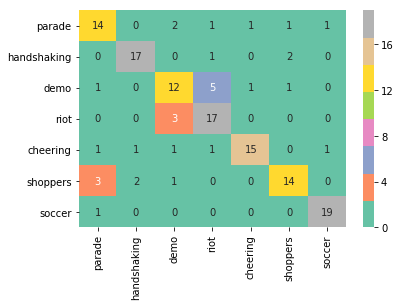

In [41]:
# display the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
print ("[INFO] confusion matrix")

# get the list of training lables
labels = sorted((os.listdir(test_path)))
print(labels)

# plot the confusion matrix
cm = confusion_matrix(labels1, preds1)
cm_df = pd.DataFrame(cm,
                     index = ['parade','handshaking','demo','riot','cheering','shoppers','soccer'], 
                     columns = ['parade','handshaking','demo','riot','cheering','shoppers','soccer'])
sns.heatmap(cm_df,
            annot=True,
            cmap="Set2")
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(labels1, preds1))

             precision    recall  f1-score   support

          0       0.70      0.70      0.70        20
          1       0.85      0.85      0.85        20
          2       0.63      0.60      0.62        20
          3       0.68      0.85      0.76        20
          4       0.88      0.75      0.81        20
          5       0.78      0.70      0.74        20
          6       0.90      0.95      0.93        20

avg / total       0.78      0.77      0.77       140



In [43]:
print(classification_report(labels1, preds1))

             precision    recall  f1-score   support

          0       0.70      0.70      0.70        20
          1       0.85      0.85      0.85        20
          2       0.63      0.60      0.62        20
          3       0.68      0.85      0.76        20
          4       0.88      0.75      0.81        20
          5       0.78      0.70      0.74        20
          6       0.90      0.95      0.93        20

avg / total       0.78      0.77      0.77       140

